
### Audio Data: Speech Emotion Recognition

#Dataset
The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS) 

Audio-only files

Audio-only files of all actors (01-24) are available in on zip files (~250 MB ):

Speech file (Audio_Speech_Actors_01-24.zip, 215 MB) contains 1440 files: 60 trials per actor x 24 actors = 1440. 

### Install following libraries

In [4]:
!pip install librosa

In [2]:
!pip install soundfile

### Make the necessary imports

In [433]:
import librosa
import soundfile
import os
import sys
import glob
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [2]:
import librosa.display
from matplotlib.pyplot import specgram
from IPython.display import Audio
import IPython.display as ipd  # To play sound in the notebook
# LOAD IN FILE
x1, sr1 = librosa.load('Audio_Speech_Actors_01-24/Audio_Speech_Actors_01-24/Actor_02/03-01-08-02-02-02-02.wav')
# PLAY AUDIO FILE
soundfile.write('ipd.Audio Files/MaleNeutral.wav', x1, sr1)
Audio(data=x1, rate=sr1)

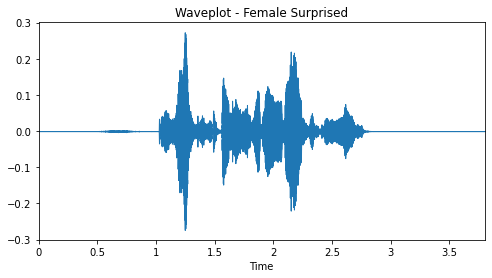

In [3]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x1, sr=sr1)
plt.title('Waveplot - Female Surprised')
plt.savefig('Waveplot_FemaleSurprised.png')

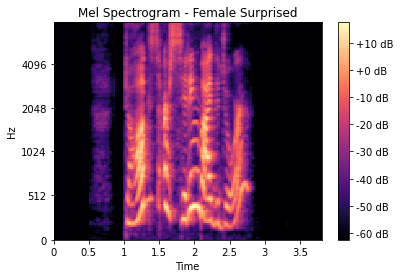

In [96]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x1, sr=sr1, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Surprised')
plt.savefig('MelSpec_FemaleSurprised.png')
plt.colorbar(format='%+2.0f dB');

#### EDA

Define a dictionary to hold numbers and the emotions available in the RAVDESS dataset, and a list to hold all 8 emotions- neutral,calm,happy,sad,angry,fearful,disgust,surprised.

In [ ]:
# Emotions in the RAVDESS 
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
# Emotions to observe
observed_emotions=['neutral','calm','happy','sad','angry','fearful', 'disgust','surprised']

Define a function extract_feature to extract the mfcc feature from a sound file. This function takes 1 parameter- MFCC value.
* mfcc: Mel Frequency Cepstral Coefficient, represents the short-term power spectrum of a sound


In [385]:
def extract_feature(value):
    result=np.array([])
    x,y,z=[],[],[]
    for file in glob.glob('Audio_Speech_Actors_01-24/Audio_Speech_Actors_01-24/Actor_*/*.wav'):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        actor=file_name.split("-")[6]
        actor_number=actor.split(".")[0]
        X, sample_rate = librosa.load(os.path.join(file), res_type='kaiser_fast')
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=value).T, axis=0)
        feature=np.hstack((result, mfccs))
        z.append(actor_number)
        x.append(feature)
        y.append(emotion)
    return x,y,z

In [406]:
extract_feature(100)   ## Call function

([array([-7.00398926e+02,  5.86302109e+01, -3.02585196e+00,  1.60402412e+01,
          4.24852943e+00,  3.86993456e+00, -6.38171625e+00, -1.88635156e-01,
         -1.37350035e+01, -3.19723994e-01, -1.47574723e+00, -9.88675654e-01,
          1.50166541e-01, -2.17246699e+00, -8.89296889e-01,  1.88273656e+00,
         -4.95709038e+00, -1.17686713e+00, -1.82013595e+00, -5.96083343e-01,
         -6.11658907e+00, -4.75335300e-01, -2.24429345e+00, -4.72435331e+00,
         -1.38391817e+00, -1.19567299e+00, -4.41322613e+00, -2.48232856e-01,
         -1.59639060e+00, -4.47082281e-01, -1.41135859e+00, -2.76977205e+00,
         -2.04200888e+00, -2.52266288e+00, -2.50744843e+00, -2.25049901e+00,
         -3.81506622e-01, -2.48105931e+00, -2.79102254e+00, -2.24486542e+00,
         -3.43279099e+00, -1.26841187e+00, -2.03744197e+00, -3.20871925e+00,
         -2.29819536e+00, -2.39117002e+00, -2.53366137e+00, -7.90085077e-01,
         -2.24025679e+00, -1.20229757e+00, -1.07712126e+00, -1.81115878e+00,

In [407]:
results = list(map(int, z))


In [408]:
gender=[]
for actor in results:
    if (actor % 2) == 0:
        gender.append('female') #Female, as the actor ID number is even.
    else:
        gender.append('male')

In [409]:
emotionRecognition = pd.DataFrame(
    {'Actor': results,
     'Gender': gender,
     'Emotion': y,
     'Feature': x
    })

In [410]:
emotionRecognition.tail(10)

,Actor,Gender,Emotion,Feature
1430,24,female,disgust,"[-513.3919677734375, 35.304344177246094, -27.5..."
1431,24,female,disgust,"[-519.2261962890625, 31.874135971069336, -22.8..."
1432,24,female,surprised,"[-682.3502197265625, 34.60175323486328, -6.953..."
1433,24,female,surprised,"[-575.8218994140625, 38.61258316040039, -20.07..."
1434,24,female,surprised,"[-609.0383911132812, 34.68635559082031, -15.04..."
1435,24,female,surprised,"[-589.9005126953125, 29.79126739501953, -22.18..."
1436,24,female,surprised,"[-536.2442016601562, 43.10594940185547, -20.25..."
1437,24,female,surprised,"[-545.240478515625, 35.28400421142578, -23.617..."
1438,24,female,surprised,"[-497.15924072265625, 30.307043075561523, -12...."
1439,24,female,surprised,"[-521.966796875, 35.219459533691406, -9.518682..."


In [411]:
#statistical summary , checking datatype, null values , shapes
emotionRecognition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Actor    1440 non-null   int64 
 1   Gender   1440 non-null   object
 2   Emotion  1440 non-null   object
 3   Feature  1440 non-null   object
dtypes: int64(1), object(3)
memory usage: 45.1+ KB


Text(0.5, 1.0, 'Distribution of Emotion')

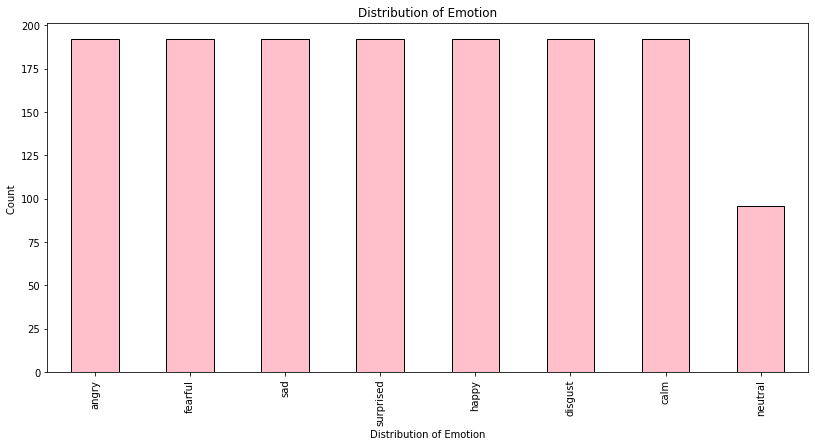

In [412]:
plt.figure(figsize=(30,45))


#plt.subplot(6,2,1)
emotionRecognition['Gender'].value_counts().plot(kind="bar", align='center',color = 'blue',edgecolor = 'black')
plt.xlabel("Number of Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")


plt.subplot(6,2,3)
emotionRecognition['Emotion'].value_counts().plot(kind="bar", align='center',color = 'pink',edgecolor = 'black')
plt.xlabel('Distribution of Emotion')
plt.ylabel('Count ')
plt.title('Distribution of Emotion') 


In [413]:
for col in ['Emotion', 'Gender']:
    print('\nColumn:', col)         # "\n" indicates new line
    print(emotionRecognition[col].value_counts())


Column: Emotion
angry        192
fearful      192
sad          192
surprised    192
happy        192
disgust      192
calm         192
neutral       96
Name: Emotion, dtype: int64

Column: Gender
female    720
male      720
Name: Gender, dtype: int64


# Split the Dataset
Time to split the dataset into training and testing sets! Let’s keep the test set 25% of everything and use the load_data function for this.

In [414]:
##Split into training and test set

# from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(np.array(x), y, test_size=0.33, random_state=9)


#Observe the shape of the training and testing datasets:

In [415]:
#Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(964, 476)


# Number of features extracted.

In [416]:
# Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 40


### Random Forest

In [417]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(n_estimators = 100, max_samples=None, random_state=42)

In [418]:
import time

starting_time = time.time()
rforest.fit(x_train,y_train)
print("Trained model in %s ms " % str(time.time() - starting_time))

Trained model in 0.8580527305603027 ms 


In [419]:
predictions_train = rforest.predict(x_train)
predictions_test = rforest.predict(x_test)

In [420]:
# Calculate the accuracy of our model
accuracy2=accuracy_score(y_true=y_train, y_pred=predictions_train)
# Print the accuracy
print("Train Accuracy: {:.2f}%".format(accuracy2*100))

Train Accuracy: 100.00%


In [421]:
# Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=predictions_test)
# Print the accuracy
print("Test Accuracy: {:.2f}%".format(accuracy*100))

Test Accuracy: 55.25%


#### There is a high difference between train and test accuracy in Randon forest model, hence overfit the model

In [422]:
print(classification_report(y_test,predictions_test))

              precision    recall  f1-score   support

       angry       0.61      0.54      0.57        71
        calm       0.51      0.91      0.66        57
     disgust       0.49      0.55      0.52        62
     fearful       0.61      0.58      0.59        66
       happy       0.56      0.41      0.47        69
     neutral       0.73      0.22      0.33        37
         sad       0.55      0.41      0.47        58
   surprised       0.54      0.73      0.62        56

    accuracy                           0.55       476
   macro avg       0.57      0.54      0.53       476
weighted avg       0.57      0.55      0.54       476



#### Use GridSearchCV to find the best hyperparametrs of a model

In [500]:
model_params_rnn = {
    'n_estimators': [50, 150, 250],
    'max_features': [0.25, 0.5, 0.75, 1.0],
    'max_samples': [0.2, 0.6, 0.8]
}

In [501]:
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestClassifier(random_state=1)

gd_sr = GridSearchCV(estimator=rf_model,
                     param_grid=model_params_rnn,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)
gd_sr.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_features': [0.25, 0.5, 0.75, 1.0],
                         'max_samples': [0.2, 0.6, 0.8],
                         'n_estimators': [50, 150, 250]},
             scoring='accuracy')

In [502]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'max_features': 0.25, 'max_samples': 0.8, 'n_estimators': 250}


In [503]:
rforest = RandomForestClassifier(n_estimators = 250, max_samples=0.8, max_features=0.25, random_state=42)

In [614]:
starting_time = time.time()
v=rforest.fit(x_train,y_train)
print("Trained model in %s ms " % str(time.time() - starting_time))

Trained model in 2.5428600311279297 ms 


In [615]:
predictions_train = rforest.predict(x_train)
predictions_test = rforest.predict(x_test)

In [616]:
# Calculate the accuracy of our model
accuracy2=accuracy_score(y_true=y_train, y_pred=predictions_train)
# Print the accuracy
print("Train Accuracy: {:.2f}%".format(accuracy2*100))

Train Accuracy: 100.00%


In [617]:
# Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=predictions_test)
# Print the accuracy
print("Test Accuracy: {:.2f}%".format(accuracy*100))

Test Accuracy: 56.93%


In [618]:
print(classification_report(y_test,predictions_test))

              precision    recall  f1-score   support

       angry       0.72      0.55      0.62        71
        calm       0.50      0.93      0.65        57
     disgust       0.52      0.53      0.52        62
     fearful       0.71      0.62      0.66        66
       happy       0.58      0.43      0.50        69
     neutral       0.80      0.22      0.34        37
         sad       0.50      0.40      0.44        58
   surprised       0.51      0.79      0.62        56

    accuracy                           0.57       476
   macro avg       0.60      0.56      0.54       476
weighted avg       0.60      0.57      0.56       476



#### Cross Validation

In [620]:
from sklearn.model_selection import cross_val_score

# no. of folds cv = 5
cv_results = cross_val_score(v, x, y, scoring='accuracy', cv = 5)
print(cv_results)
print(cv_results.mean())
print(cv_results.std())

[0.37847222 0.32291667 0.36805556 0.39583333 0.375     ]
0.3680555555555555
0.024355108217708577


### Support Vector Machine

In [424]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
starting_time_SVC = time.time()
svclassifier.fit(x_train, y_train)
print("Trained model in %s ms " % str(time.time() - starting_time_SVC))

Trained model in 35.19520878791809 ms 


In [425]:
SVC_train = svclassifier.predict(x_train)
SCV_test = svclassifier.predict(x_test)

In [426]:
# Calculate the accuracy of our model
train_accuracy_SVC=accuracy_score(y_true=y_train, y_pred=SVC_train)
# Print the accuracy
print("Train Accuracy: {:.2f}%".format(train_accuracy_SVC*100))
                                       
# Calculate the accuracy of our model
test_accuracy_SVC=accuracy_score(y_true=y_test, y_pred=SCV_test)
# Print the accuracy
print("Test Accuracy: {:.2f}%".format(accuracy*100))

Train Accuracy: 69.61%
Test Accuracy: 55.25%


In [427]:
from sklearn.metrics import classification_report
print(classification_report(y_test,SCV_test))

              precision    recall  f1-score   support

       angry       0.62      0.62      0.62        71
        calm       0.45      0.67      0.54        57
     disgust       0.44      0.39      0.41        62
     fearful       0.49      0.58      0.53        66
       happy       0.51      0.43      0.47        69
     neutral       0.50      0.32      0.39        37
         sad       0.46      0.45      0.46        58
   surprised       0.51      0.45      0.48        56

    accuracy                           0.50       476
   macro avg       0.50      0.49      0.49       476
weighted avg       0.50      0.50      0.49       476



#### Use GridSearchCV to find the best hyperparametrs of a model

In [544]:
from sklearn.model_selection import GridSearchCV
grid_param = {'C': [0.1, 1, 5, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}  
gd_sr = GridSearchCV(estimator=svclassifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)
gd_sr.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(C=5, gamma=0.001), n_jobs=-1,
             param_grid={'C': [0.1, 1, 5, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring='accuracy')

In [546]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [609]:
svclassifier = SVC(kernel='rbf', C=100, gamma=0.001)
starting_time_SVC = time.time()
t=svclassifier.fit(x_train, y_train)
print("Trained model in %s ms " % str(time.time() - starting_time_SVC))

Trained model in 0.19488883018493652 ms 


In [610]:
SVC_train = svclassifier.predict(x_train)
SCV_test = svclassifier.predict(x_test)

In [611]:
# Calculate the accuracy of our model
train_accuracy_SVC=accuracy_score(y_true=y_train, y_pred=SVC_train)
# Print the accuracy
print("Train Accuracy: {:.2f}%".format(train_accuracy_SVC*100))
                                       
# Calculate the accuracy of our model
test_accuracy_SVC=accuracy_score(y_true=y_test, y_pred=SCV_test)
# Print the accuracy
print("Test Accuracy: {:.2f}%".format(accuracy*100))

Train Accuracy: 100.00%
Test Accuracy: 56.93%


In [612]:
print(classification_report(y_test,SCV_test))

              precision    recall  f1-score   support

       angry       0.75      0.65      0.70        71
        calm       0.64      0.82      0.72        57
     disgust       0.60      0.45      0.51        62
     fearful       0.68      0.76      0.71        66
       happy       0.52      0.51      0.51        69
     neutral       0.63      0.59      0.61        37
         sad       0.53      0.48      0.50        58
   surprised       0.53      0.62      0.57        56

    accuracy                           0.61       476
   macro avg       0.61      0.61      0.61       476
weighted avg       0.61      0.61      0.61       476



#### Cross Validation

In [613]:
# no. of folds cv = 10
cv_results = cross_val_score(t, x, y, scoring='accuracy', cv = 5)
print(cv_results)
print(cv_results.mean())
print(cv_results.std())

[0.34375    0.31597222 0.44097222 0.33333333 0.26388889]
0.3395833333333333
0.05765980209624186


### K-Nearest Neighbors

In [428]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
starting_time_knn = time.time()
knn_classifier.fit(x_train, y_train)
print("Trained model in %s ms " % str(time.time() - starting_time_knn))

Trained model in 0.024983882904052734 ms 


In [429]:
knn_train = knn_classifier.predict(x_train)
knn_test = knn_classifier.predict(x_test)

In [430]:
# Calculate the accuracy of our model
train_accuracy_knn=accuracy_score(y_true=y_train, y_pred=knn_train)
# Print the accuracy
print("Train Accuracy: {:.2f}%".format(train_accuracy_knn*100))
                                       
# Calculate the accuracy of our model
test_accuracy_SVC=accuracy_score(y_true=y_test, y_pred=knn_test)
# Print the accuracy
print("Test Accuracy: {:.2f}%".format(accuracy*100))

Train Accuracy: 65.25%
Test Accuracy: 55.25%


In [545]:
print(classification_report(y_train,knn_train))

              precision    recall  f1-score   support

       angry       1.00      1.00      1.00       121
        calm       1.00      1.00      1.00       135
     disgust       1.00      1.00      1.00       130
     fearful       1.00      1.00      1.00       126
       happy       1.00      1.00      1.00       123
     neutral       1.00      1.00      1.00        59
         sad       1.00      1.00      1.00       134
   surprised       1.00      1.00      1.00       136

    accuracy                           1.00       964
   macro avg       1.00      1.00      1.00       964
weighted avg       1.00      1.00      1.00       964



In [431]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn_test))

              precision    recall  f1-score   support

       angry       0.53      0.69      0.60        71
        calm       0.48      0.75      0.59        57
     disgust       0.38      0.32      0.35        62
     fearful       0.48      0.39      0.43        66
       happy       0.39      0.32      0.35        69
     neutral       0.29      0.27      0.28        37
         sad       0.44      0.29      0.35        58
   surprised       0.38      0.39      0.39        56

    accuracy                           0.44       476
   macro avg       0.42      0.43      0.42       476
weighted avg       0.43      0.44      0.43       476



#### Use GridSearchCV to find the best hyperparametrs of a model

In [454]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,10))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [455]:
#grid_param = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
gd_sr = GridSearchCV(estimator=knn_classifier,
                     param_grid=hyperparameters,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)
gd_sr.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'p': [1, 2]},
             scoring='accuracy')

In [456]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'leaf_size': 1, 'n_neighbors': 1, 'p': 1}


In [637]:
knn_classifier = KNeighborsClassifier(leaf_size = 1, n_neighbors =2, p =1 )
starting_time_knn = time.time()
b=knn_classifier.fit(x_train, y_train)
print("Trained model in %s ms " % str(time.time() - starting_time_knn))

Trained model in 0.021988868713378906 ms 


In [638]:
knn_train = knn_classifier.predict(x_train)
knn_test = knn_classifier.predict(x_test)

In [639]:
# Calculate the accuracy of our model
train_accuracy_knn=accuracy_score(y_true=y_train, y_pred=knn_train)
# Print the accuracy
print("Train Accuracy: {:.2f}%".format(train_accuracy_knn*100))
                                       
# Calculate the accuracy of our model
test_accuracy_SVC=accuracy_score(y_true=y_test, y_pred=knn_test)
# Print the accuracy
print("Test Accuracy: {:.2f}%".format(accuracy*100))

Train Accuracy: 83.09%
Test Accuracy: 56.93%


In [640]:
print(classification_report(y_test,knn_test))

              precision    recall  f1-score   support

       angry       0.64      0.79      0.70        71
        calm       0.54      0.88      0.67        57
     disgust       0.48      0.56      0.52        62
     fearful       0.61      0.61      0.61        66
       happy       0.53      0.45      0.48        69
     neutral       0.57      0.43      0.49        37
         sad       0.63      0.29      0.40        58
   surprised       0.71      0.54      0.61        56

    accuracy                           0.58       476
   macro avg       0.59      0.57      0.56       476
weighted avg       0.59      0.58      0.57       476



#### Cross Validation

In [632]:
# no. of folds cv = 5
cv_results = cross_val_score(b, x, y, scoring='accuracy', cv = 5)
print(cv_results)
print(cv_results.mean())
print(cv_results.std())

[0.30208333 0.27430556 0.36111111 0.29861111 0.28819444]
0.30486111111111114
0.029739740424116465
